## This script reads data for different variables downloaded from Casper in NCAR (Fig 7)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 
import matplotlib as mpl
import shapefile as shp
import cartopy.io.shapereader as shpreader
from numpy import linspace
from numpy import meshgrid
import matplotlib.colors as colors
from numpy import array, ma
import cartopy.crs as ccrs
import matplotlib.cm as cm
import cartopy.feature as cfeature

## Basin shape files

In [2]:

shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'


In [3]:

sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)


In [4]:

reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#

reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#


## Using data processed from GLADE access to NCAR HPC

## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

### Lat

In [5]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/latsUsArr.npy'

lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


### Lon

In [6]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


### Historical (1850-2014): 1980 months

In [7]:
#file_hist_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/mon/precip/monPrecipUsHistEnsMems.npy'
file_hist_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsHistEnsMean.npy'

file_hist_ensMean_loaded = np.load(file_hist_ensMean)
print(file_hist_ensMean_loaded.shape)
maxVal = np.nanmax(file_hist_ensMean_loaded)
maxVal

(1980, 32, 56)


453.8662595041387

### Scenario (2105-2100): 1032 months

In [8]:
#file_Scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/monSoilMoistUsScenEnsMems.npy'
#file_scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/mon/precip/monPrecipUsScenEnsMems.npy'
file_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsScenEnsMean.npy'

file_scen_ensMean_loaded = np.load(file_scen_ensMean)
print(file_scen_ensMean_loaded.shape)
maxVal = np.nanmax(file_scen_ensMean_loaded)
maxVal

(1032, 32, 56)


520.7679244813335

## The four time slots

In [9]:

histYrSt = 1850

refPeriodYrSt = 1971
refPeriodYrEnd = 2000
#++++++++++++++++++++++++

scenYrSt = 2015
scenEraOneYrEnd = 2044

scenEraTwoYrSt = 2045
scenEraTwoYrEnd = 2074

scenEraThreeYrSt = 2075
scenYrEnd = 2100
#


## tsteps

In [10]:
nMonsPerYr = 12     # 
print(nMonsPerYr)

12


## Reference Period

In [11]:
refPeriodStepSt = (refPeriodYrSt - histYrSt)*nMonsPerYr
refPeriodStepEnd = (refPeriodYrEnd - histYrSt + 1)*nMonsPerYr
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

1452 1812
360


## Era 1

In [12]:
scenEraOneStepSt = 0
scenEraOneStepEnd = (scenEraOneYrEnd - scenYrSt + 1)*nMonsPerYr
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

0 360
360


## Era 2

In [13]:
scenEraTwoStepSt = (scenEraTwoYrSt - scenYrSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraTwoYrEnd - scenYrSt + 1)*nMonsPerYr
print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

360 720
360


## Era 3

In [14]:
scenEraThreeStepSt = (scenEraThreeYrSt - scenYrSt)*nMonsPerYr
scenEraThreeStepEnd = (scenYrEnd - scenYrSt + 1)*nMonsPerYr
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

720 1032
312


## Subsetting the data into different periods / Eras

In [15]:
param_refPeriod_Us_ensmean = file_hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(param_refPeriod_Us_ensmean.shape)

(360, 32, 56)


In [16]:
param_scenEraOne_Us_ensmean = file_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(param_scenEraOne_Us_ensmean.shape)

(360, 32, 56)


In [17]:
param_scenEraTwo_Us_ensmean = file_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(param_scenEraTwo_Us_ensmean.shape)

(360, 32, 56)


In [18]:
param_scenEraThree_Us_ensmean = file_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(param_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Time average value at the reference period and at the three Eras

In [19]:
param_refPeriod_Us_ensmean_timeAvg = np.nanmean(param_refPeriod_Us_ensmean, axis=0)
print(param_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


In [20]:
param_scenEraOne_Us_ensmean_timeAvg = np.nanmean(param_scenEraOne_Us_ensmean, axis=0)
print(param_scenEraOne_Us_ensmean_timeAvg.shape)

(32, 56)


In [21]:
param_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(param_scenEraTwo_Us_ensmean, axis=0)
print(param_scenEraTwo_Us_ensmean_timeAvg.shape)

(32, 56)


In [22]:
param_scenEraThree_Us_ensmean_timeAvg = np.nanmean(param_scenEraThree_Us_ensmean, axis=0)
print(param_scenEraThree_Us_ensmean_timeAvg.shape)

(32, 56)


## Differences of Precipitation at the three Eras relative to the refernce period mean

In [23]:
print(param_refPeriod_Us_ensmean_timeAvg.shape)
print(param_scenEraOne_Us_ensmean_timeAvg.shape)
print(param_scenEraTwo_Us_ensmean_timeAvg.shape)
print(param_scenEraThree_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)
(32, 56)


In [24]:
param_scenEraOne_diff_Us_ensmean_timeAvg = (param_scenEraOne_Us_ensmean_timeAvg - param_refPeriod_Us_ensmean_timeAvg)
print(param_scenEraOne_diff_Us_ensmean_timeAvg.shape)

param_scenEraTwo_diff_Us_ensmean_timeAvg = (param_scenEraTwo_Us_ensmean_timeAvg - param_refPeriod_Us_ensmean_timeAvg)
print(param_scenEraTwo_diff_Us_ensmean_timeAvg.shape)

param_scenEraThree_diff_Us_ensmean_timeAvg = (param_scenEraThree_Us_ensmean_timeAvg - param_refPeriod_Us_ensmean_timeAvg)
print(param_scenEraThree_diff_Us_ensmean_timeAvg.shape)



(32, 56)
(32, 56)
(32, 56)


## Writing in an Xarray Data array

In [25]:
y_Us, x_Us = param_scenEraOne_diff_Us_ensmean_timeAvg.shape
print(y_Us)
print(x_Us)

32
56


In [26]:
param_scenEraOne_diff_Us_xarray = xr.DataArray(param_scenEraOne_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(param_scenEraOne_diff_Us_xarray.shape)
print(param_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-0.58837701, -0.39874556, -0.32652769, ...,  0.91091265,
         0.66223786,  0.29843128],
       [-0.59684059, -0.41044162, -0.24715516, ...,  1.45909638,
         1.32703012,  1.13672896],
       [-0.72468071, -0.51727308, -0.30913081, ...,  2.06978758,
         1.944079  ,  1.80885732],
       ...,
       [ 2.94244802,  3.29396453,  0.64677028, ...,  4.63648885,
         4.71327117,  4.72934506],
       [ 3.13226449,  1.28783264,  0.71764429, ...,  4.93825177,
         4.79610941,  4.54157176],
       [ 2.12178381,  1.19058984,  1.3053737 , ...,  4.97864564,
         4.57574413,  3.90556634]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [27]:
param_scenEraTwo_diff_Us_xarray = xr.DataArray(param_scenEraTwo_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(param_scenEraTwo_diff_Us_xarray.shape)
print(param_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[-0.4267514 , -0.35157167, -0.30272308, ...,  1.68596563,
         0.95355654, -0.08805744],
       [-0.25545582, -0.17746797, -0.09991694, ...,  3.36663559,
         2.72075732,  1.82892985],
       [-0.0777135 , -0.01784704,  0.06270102, ...,  4.90526746,
         4.14873737,  3.40494744],
       ...,
       [10.51256402, 11.08875868,  5.41566476, ...,  7.83459521,
         8.04256256,  8.19337382],
       [11.76805786,  7.6640741 ,  4.84968925, ...,  7.71840456,
         7.69407721,  7.72622633],
       [ 8.66497128,  6.08274327,  5.00584121, ...,  7.30951067,
         6.73901484,  6.1786158 ]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [28]:
param_scenEraThree_diff_Us_xarray = xr.DataArray(param_scenEraThree_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(param_scenEraThree_diff_Us_xarray.shape)
print(param_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.47402534,  0.27230859,  0.0692417 , ...,  2.52960878,
         1.26305461, -0.23185024],
       [ 0.80316176,  0.71531359,  0.57780094, ...,  5.53084325,
         4.41497383,  3.13205294],
       [ 1.16002157,  1.11540173,  1.05101034, ...,  8.00146461,
         7.04175952,  6.09077061],
       ...,
       [18.07987902, 18.96075658,  9.26749034, ..., 13.3144104 ,
        13.75510944, 14.0114068 ],
       [20.10782502, 13.94756362,  8.34969076, ..., 12.54967645,
        12.8382115 , 13.04148778],
       [15.00029742, 10.5492239 ,  8.66942705, ..., 11.56829182,
        11.04185413, 10.68607574]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

### Mississippi

In [29]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [30]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [31]:
param_scenEraOne_diff_masked_Missi = param_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_scenEraOne_diff_masked_Missi.shape)
print(param_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [32]:
param_scenEraTwo_diff_masked_Missi = param_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_scenEraTwo_diff_masked_Missi.shape)
print(param_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [33]:
param_scenEraThree_diff_masked_Missi = param_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(param_scenEraThree_diff_masked_Missi.shape)
print(param_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Find max and min values

In [34]:
maxVal_diff_scenEraOne = np.nanmax(param_scenEraOne_diff_masked_Missi)
print(maxVal_diff_scenEraOne)

minVal_diff_scenEraOne = np.nanmin(param_scenEraOne_diff_masked_Missi)
print(minVal_diff_scenEraOne)


5.073504423156805
0.09344309245379634


In [35]:
maxVal_diff_scenEraTwo = np.nanmax(param_scenEraTwo_diff_masked_Missi)
print(maxVal_diff_scenEraTwo)

minVal_diff_scenEraTwo = np.nanmin(param_scenEraTwo_diff_masked_Missi)
print(minVal_diff_scenEraTwo)


9.640323909652992
0.5723455293764381


In [36]:
maxVal_diff_scenEraThree = np.nanmax(param_scenEraThree_diff_masked_Missi)
print(maxVal_diff_scenEraThree)

minVal_diff_scenEraThree = np.nanmin(param_scenEraThree_diff_masked_Missi)
print(minVal_diff_scenEraThree)


14.918096066468763
1.403391487860187


## Plotting a Map of Precipitation fields

In [37]:

latUsMin = lats_US.min()     # = or = latsCfsDnSc
print(latUsMin)

latUsMax = lats_US.max()
print(latUsMax)

lonUsMin = lons_US.min()
print(lonUsMin)

lonUsMax = lons_US.max()
print(lonUsMax)

24.973822
54.18848
230.0
298.75


In [38]:
extentUs = [lonUsMin, lonUsMax, latUsMin, latUsMax]
print(extentUs)

[230.0, 298.75, 24.973822, 54.18848]


In [39]:
x_Us = linspace(lonUsMin, lonUsMax, x_Us)
y_Us = linspace(latUsMin, latUsMax, y_Us)
print(x_Us)
print(y_Us)

# Create the rectangular grid out of these values
xx_Us, yy_Us = meshgrid(x_Us, y_Us)


[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]
[24.97382164 25.91622999 26.85863833 27.80104668 28.74345503 29.68586337
 30.62827172 31.57068006 32.51308841 33.45549676 34.3979051  35.34031345
 36.2827218  37.22513014 38.16753849 39.10994684 40.05235518 40.99476353
 41.93717187 42.87958022 43.82198857 44.76439691 45.70680526 46.64921361
 47.59162195 48.5340303  49.47643865 50.41884699 51.36125534 52.30366368
 53.24607203 54.18848038]


In [40]:
vmin_scenEraOne = np.floor(minVal_diff_scenEraOne)
vmax_scenEraOne = np.ceil(maxVal_diff_scenEraOne)
print(vmin_scenEraOne)
print(vmax_scenEraOne)

0.0
6.0


In [41]:

#vmin_scenEraOne = np.floor(minVal_diff_scenEraOne)
vmin_scenEraOne = 0.1

vmax_scenEraOne = np.ceil(maxVal_diff_scenEraOne)
print(vmin_scenEraOne)
print(vmax_scenEraOne)


0.1
6.0


In [42]:
vmin_scenEraTwo = np.floor(minVal_diff_scenEraTwo)
vmax_scenEraTwo = np.ceil(maxVal_diff_scenEraTwo)
print(vmin_scenEraTwo)
print(vmax_scenEraTwo)

0.0
10.0


In [43]:
vmin_scenEraThree = np.floor(minVal_diff_scenEraThree)
vmax_scenEraThree = np.ceil(maxVal_diff_scenEraThree)
print(vmin_scenEraThree)
print(vmax_scenEraThree)

1.0
15.0


In [44]:
nDiv_scenEraOne = int(vmax_scenEraOne - vmin_scenEraOne + 1)
print(nDiv_scenEraOne)

6


In [45]:
nDiv_scenEraTwo = int(vmax_scenEraTwo - vmin_scenEraTwo + 1)
print(nDiv_scenEraTwo)

11


In [46]:
nDiv_scenEraThree = int(vmax_scenEraThree - vmin_scenEraThree + 1)
print(nDiv_scenEraThree)

15


## Loading data for other parameters saved in the Disk

## ET

### Historical (1850-2014): 1980 months

In [47]:
#file_hist_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/mon/precip/monPrecipUsHistEnsMems.npy'
file_et_hist_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/monEtUsHistEnsMean.npy'

file_et_hist_ensMean_loaded = np.load(file_et_hist_ensMean)
print(file_et_hist_ensMean_loaded.shape)
maxVal = np.nanmax(file_et_hist_ensMean_loaded)
maxVal

(1980, 32, 56)


9.999999616903162e+35

### Scenario (2105-2100): 1032 months

In [48]:

file_et_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/monEtUsScenEnsMean.npy'

file_et_scen_ensMean_loaded = np.load(file_et_scen_ensMean)
print(file_et_scen_ensMean_loaded.shape)
maxVal = np.nanmax(file_et_scen_ensMean_loaded)
maxVal

(1032, 32, 56)


9.999999616903162e+35

## Subsetting the data into different periods / Eras

In [49]:
et_refPeriod_Us_ensmean = file_et_hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(et_refPeriod_Us_ensmean.shape)

(360, 32, 56)


In [50]:
et_scenEraOne_Us_ensmean = file_et_hist_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(et_scenEraOne_Us_ensmean.shape)

(360, 32, 56)


In [51]:
et_scenEraTwo_Us_ensmean = file_et_hist_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(et_scenEraTwo_Us_ensmean.shape)

(360, 32, 56)


In [52]:
et_scenEraThree_Us_ensmean = file_et_hist_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(et_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Time average value at the ref period and at the three Eras

In [53]:
et_refPeriod_Us_ensmean_timeAvg = np.nanmean(et_refPeriod_Us_ensmean, axis=0)
print(et_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


In [54]:
et_scenEraOne_Us_ensmean_timeAvg = np.nanmean(et_scenEraOne_Us_ensmean, axis=0)
print(et_scenEraOne_Us_ensmean_timeAvg.shape)

(32, 56)


In [55]:
et_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(et_scenEraTwo_Us_ensmean, axis=0)
print(et_scenEraTwo_Us_ensmean_timeAvg.shape)

(32, 56)


In [56]:
et_scenEraThree_Us_ensmean_timeAvg = np.nanmean(et_scenEraThree_Us_ensmean, axis=0)
print(et_scenEraThree_Us_ensmean_timeAvg.shape)

(32, 56)


## Differences of ET at the three Eras relative to the refernce period mean

In [57]:
et_scenEraOne_diff_Us_ensmean_timeAvg = (et_scenEraOne_Us_ensmean_timeAvg - et_refPeriod_Us_ensmean_timeAvg)
print(et_scenEraOne_diff_Us_ensmean_timeAvg.shape)

et_scenEraTwo_diff_Us_ensmean_timeAvg = (et_scenEraTwo_Us_ensmean_timeAvg - et_refPeriod_Us_ensmean_timeAvg)
print(et_scenEraTwo_diff_Us_ensmean_timeAvg.shape)

et_scenEraThree_diff_Us_ensmean_timeAvg = (et_scenEraThree_Us_ensmean_timeAvg - et_refPeriod_Us_ensmean_timeAvg)
print(et_scenEraThree_diff_Us_ensmean_timeAvg.shape)

(32, 56)
(32, 56)
(32, 56)


## Writing in an Xarray Data array

In [58]:
et_scenEraOne_diff_Us_xarray = xr.DataArray(et_scenEraOne_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(et_scenEraOne_diff_Us_xarray.shape)
print(et_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.7653737 , 1.78320917, ..., 1.50638625, 0.55782894,
        0.69452435],
       [2.06401163, 1.80436522, 1.51754159, ..., 4.6422183 , 1.11016483,
        1.18133059],
       [1.89114626, 1.63623039, 1.79519151, ..., 0.55580759, 2.5947123 ,
        0.7853473 ]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [59]:
et_scenEraTwo_diff_Us_xarray = xr.DataArray(et_scenEraTwo_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])

print(et_scenEraTwo_diff_Us_xarray.shape)
print(et_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.53828795, 1.62186605, ..., 1.14533168, 0.21899604,
        0.39225502],
       [1.81287872, 1.56787497, 1.35411625, ..., 4.35344066, 0.89995996,
        0.99317723],
       [1.61863306, 1.38155709, 1.59918023, ..., 0.43971171, 2.46083504,
        0.73475434]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [60]:
et_scenEraThree_diff_Us_xarray = xr.DataArray(et_scenEraThree_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(et_scenEraThree_diff_Us_xarray.shape)
print(et_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.56275522, 1.34008788, ..., 1.10606632, 0.29385069,
        0.2517173 ],
       [1.78519633, 1.36377777, 1.12699548, ..., 4.43630942, 0.87129069,
        0.7950312 ],
       [1.37096016, 1.11850972, 1.35195802, ..., 0.79740343, 2.67911746,
        0.62765283]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

In [61]:
et_scenEraOne_diff_masked_Missi = et_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(et_scenEraOne_diff_masked_Missi.shape)
print(et_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [62]:
et_scenEraTwo_diff_masked_Missi = et_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(et_scenEraTwo_diff_masked_Missi.shape)
print(et_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [63]:
et_scenEraThree_diff_masked_Missi = et_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(et_scenEraThree_diff_masked_Missi.shape)
print(et_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Snowmelt

### Historical (1930-2014): 1020 months

In [64]:

file_snowMelt_histSel_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/monSnowMeltUsHistSelEnsMean.npy'
file_snowMelt_histSel_ensMean_loaded = np.load(file_snowMelt_histSel_ensMean)
print(file_snowMelt_histSel_ensMean_loaded.shape)
maxVal = np.nanmax(file_snowMelt_histSel_ensMean_loaded)
maxVal

(1020, 32, 56)


9.999999616903162e+35

### Scenario (2105-2100): 1032 months

In [65]:

file_snowMelt_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/monSnowMeltUsScenEnsMean.npy'

file_snowMelt_scen_ensMean_loaded = np.load(file_snowMelt_scen_ensMean)
print(file_snowMelt_scen_ensMean_loaded.shape)
maxVal = np.nanmax(file_snowMelt_scen_ensMean_loaded)
maxVal

(1032, 32, 56)


9.999999616903162e+35

## The four time slots

In [66]:

#histYrSt = 1850
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000
#++++++++++++++++++++++++

scenYrSt = 2015
scenEraOneYrEnd = 2044

scenEraTwoYrSt = 2045
scenEraTwoYrEnd = 2074

scenEraThreeYrSt = 2075
scenYrEnd = 2100
#


## Reference Period

In [67]:
refPeriodStepSt = (refPeriodYrSt - histYrSelSt)*nMonsPerYr

refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*nMonsPerYr
#refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*nMonsPerYr + 2   # To include Jan and Feb of the following year in 2001

print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

492 852
360


## Subsetting the data into different periods / Eras

In [68]:
snowMelt_refPeriod_Us_ensmean = file_snowMelt_histSel_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(snowMelt_refPeriod_Us_ensmean.shape)

(360, 32, 56)


In [69]:
snowMelt_scenEraOne_Us_ensmean = file_snowMelt_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(snowMelt_scenEraOne_Us_ensmean.shape)

(360, 32, 56)


In [70]:
snowMelt_scenEraTwo_Us_ensmean = file_snowMelt_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(snowMelt_scenEraTwo_Us_ensmean.shape)

(360, 32, 56)


In [71]:
snowMelt_scenEraThree_Us_ensmean = file_snowMelt_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(snowMelt_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Time average value at the ref period and at the three Eras

In [72]:
snowMelt_refPeriod_Us_ensmean_timeAvg = np.nanmean(snowMelt_refPeriod_Us_ensmean, axis=0)
print(snowMelt_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


In [73]:
snowMelt_scenEraOne_Us_ensmean_timeAvg = np.nanmean(snowMelt_scenEraOne_Us_ensmean, axis=0)
print(snowMelt_scenEraOne_Us_ensmean_timeAvg.shape)

(32, 56)


In [74]:
snowMelt_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(snowMelt_scenEraTwo_Us_ensmean, axis=0)
print(snowMelt_scenEraTwo_Us_ensmean_timeAvg.shape)

(32, 56)


In [75]:
snowMelt_scenEraThree_Us_ensmean_timeAvg = np.nanmean(snowMelt_scenEraThree_Us_ensmean, axis=0)
print(snowMelt_scenEraThree_Us_ensmean_timeAvg.shape)

(32, 56)


## Differences of SnowMelt at the three Eras relative to the refernce period mean

In [76]:
snowMelt_scenEraOne_diff_Us_ensmean_timeAvg = (snowMelt_scenEraOne_Us_ensmean_timeAvg - snowMelt_refPeriod_Us_ensmean_timeAvg)
print(snowMelt_scenEraOne_diff_Us_ensmean_timeAvg.shape)

snowMelt_scenEraTwo_diff_Us_ensmean_timeAvg = (snowMelt_scenEraTwo_Us_ensmean_timeAvg - snowMelt_refPeriod_Us_ensmean_timeAvg)
print(snowMelt_scenEraTwo_diff_Us_ensmean_timeAvg.shape)

snowMelt_scenEraThree_diff_Us_ensmean_timeAvg = (snowMelt_scenEraThree_Us_ensmean_timeAvg - snowMelt_refPeriod_Us_ensmean_timeAvg)
print(snowMelt_scenEraThree_diff_Us_ensmean_timeAvg.shape)


(32, 56)
(32, 56)
(32, 56)


## Writing in an Xarray Data array

In [77]:
snowMelt_scenEraOne_diff_Us_xarray = xr.DataArray(snowMelt_scenEraOne_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(snowMelt_scenEraOne_diff_Us_xarray.shape)
print(snowMelt_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -2.40409321, -18.85578442, ...,  -8.70670078,
         -0.62807347,  -1.48498285],
       [ -2.60172586, -16.69630991, -14.39103257, ...,  -6.62307382,
         -5.10647301,  -8.48620418],
       [-14.83621195, -16.35543021,  -8.67262303, ...,  -6.4850803 ,
         -7.26803971, -10.14353277]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [78]:
snowMelt_scenEraTwo_diff_Us_xarray = xr.DataArray(snowMelt_scenEraTwo_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(snowMelt_scenEraTwo_diff_Us_xarray.shape)
print(snowMelt_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -4.10658936, -36.59035778, ..., -16.01039657,
         -2.98549773,  -5.37625249],
       [ -4.44311764, -30.61093841, -30.47587493, ..., -14.31437835,
        -12.40732011, -14.07737136],
       [-26.74692392, -33.0861306 , -18.56236693, ..., -13.41632672,
        -15.47775533, -13.55949169]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [79]:
snowMelt_scenEraThree_diff_Us_xarray = xr.DataArray(snowMelt_scenEraThree_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(snowMelt_scenEraThree_diff_Us_xarray.shape)
print(snowMelt_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -5.08158981, -52.32325255, ..., -21.13370425,
         -9.68586267, -13.91982091],
       [ -5.61072309, -41.70685921, -48.97156871, ..., -17.49074205,
        -16.59643698, -20.13937104],
       [-36.41662762, -51.87407871, -31.49545651, ..., -16.97875219,
        -19.7060942 , -17.98392353]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

In [80]:
snowMelt_scenEraOne_diff_masked_Missi = snowMelt_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(snowMelt_scenEraOne_diff_masked_Missi.shape)
print(snowMelt_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [81]:
snowMelt_scenEraTwo_diff_masked_Missi = snowMelt_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(snowMelt_scenEraTwo_diff_masked_Missi.shape)
print(snowMelt_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [82]:
snowMelt_scenEraThree_diff_masked_Missi = snowMelt_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(snowMelt_scenEraThree_diff_masked_Missi.shape)
print(snowMelt_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Soil Moisture

### Historical (1930-2014): 1020 months

In [83]:

file_soilMoist_histSel_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/monSoilMoistUsHistSelEnsMean.npy'

file_soilMoist_histSel_ensMean_loaded = np.load(file_soilMoist_histSel_ensMean)
print(file_soilMoist_histSel_ensMean_loaded.shape)
maxVal = np.nanmax(file_soilMoist_histSel_ensMean_loaded)
maxVal

(1020, 32, 56)


9.999999616903162e+35

### Scenario (2105-2100): 1032 months

In [84]:

file_soilMoist_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/monSoilMoistUsScenEnsMean.npy'

file_soilMoist_scen_ensMean_loaded = np.load(file_soilMoist_scen_ensMean)
print(file_soilMoist_scen_ensMean_loaded.shape)
maxVal = np.nanmax(file_soilMoist_scen_ensMean_loaded)
maxVal

(1032, 32, 56)


9.999999616903162e+35

## Subsetting the data into different periods / Eras

In [85]:
soilMoist_refPeriod_Us_ensmean = file_soilMoist_histSel_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(soilMoist_refPeriod_Us_ensmean.shape)

(360, 32, 56)


In [86]:
soilMoist_scenEraOne_Us_ensmean = file_soilMoist_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(soilMoist_scenEraOne_Us_ensmean.shape)

(360, 32, 56)


In [87]:
soilMoist_scenEraTwo_Us_ensmean = file_soilMoist_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(soilMoist_scenEraTwo_Us_ensmean.shape)

(360, 32, 56)


In [88]:
soilMoist_scenEraThree_Us_ensmean = file_soilMoist_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(soilMoist_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Time average value at the ref period and at the three Eras

In [89]:
soilMoist_refPeriod_Us_ensmean_timeAvg = np.nanmean(soilMoist_refPeriod_Us_ensmean, axis=0)
print(soilMoist_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


In [90]:
soilMoist_scenEraOne_Us_ensmean_timeAvg = np.nanmean(soilMoist_scenEraOne_Us_ensmean, axis=0)
print(soilMoist_scenEraOne_Us_ensmean_timeAvg.shape)

(32, 56)


In [91]:
soilMoist_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(soilMoist_scenEraTwo_Us_ensmean, axis=0)
print(soilMoist_scenEraTwo_Us_ensmean_timeAvg.shape)

(32, 56)


In [92]:
soilMoist_scenEraThree_Us_ensmean_timeAvg = np.nanmean(soilMoist_scenEraThree_Us_ensmean, axis=0)
print(soilMoist_scenEraThree_Us_ensmean_timeAvg.shape)

(32, 56)


## Differences of Soil Moisture at the three Eras relative to the refernce period mean

In [93]:
soilMoist_scenEraOne_diff_Us_ensmean_timeAvg = (soilMoist_scenEraOne_Us_ensmean_timeAvg - soilMoist_refPeriod_Us_ensmean_timeAvg)
print(soilMoist_scenEraOne_diff_Us_ensmean_timeAvg.shape)

soilMoist_scenEraTwo_diff_Us_ensmean_timeAvg = (soilMoist_scenEraTwo_Us_ensmean_timeAvg - soilMoist_refPeriod_Us_ensmean_timeAvg)
print(soilMoist_scenEraTwo_diff_Us_ensmean_timeAvg.shape)

soilMoist_scenEraThree_diff_Us_ensmean_timeAvg = (soilMoist_scenEraThree_Us_ensmean_timeAvg - soilMoist_refPeriod_Us_ensmean_timeAvg)
print(soilMoist_scenEraThree_diff_Us_ensmean_timeAvg.shape)



(32, 56)
(32, 56)
(32, 56)


## Writing in an Xarray Data array

In [94]:
soilMoist_scenEraOne_diff_Us_xarray = xr.DataArray(soilMoist_scenEraOne_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(soilMoist_scenEraOne_diff_Us_xarray.shape)
print(soilMoist_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.31514726,  -0.87040546, ..., -15.34342363,
         -1.714768  ,  -2.46252887],
       [ -0.39835385,  -0.89140431,  -0.53321743, ...,  -3.46557077,
         -8.81997889, -20.26027182],
       [ -0.91328951,  -0.17825635,  -0.38910449, ...,  -0.86682921,
         -2.19979497, -21.09788444]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [95]:
soilMoist_scenEraTwo_diff_Us_xarray = xr.DataArray(soilMoist_scenEraTwo_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(soilMoist_scenEraTwo_diff_Us_xarray.shape)
print(soilMoist_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.44863758,  -1.70612303, ..., -23.07569321,
         -2.56494809,  -3.71041324],
       [ -0.64451368,  -1.79128203,  -1.27192627, ..., -23.47633998,
        -24.46076055, -22.09776567],
       [ -1.94999523,  -0.58437863,  -0.78495701, ..., -15.36782463,
        -19.20267226, -22.69221115]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [96]:
soilMoist_scenEraThree_diff_Us_xarray = xr.DataArray(soilMoist_scenEraThree_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US ], dims=["Lat","Lon"])

print(soilMoist_scenEraThree_diff_Us_xarray.shape)
print(soilMoist_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,  -0.51587423,  -2.37512073, ..., -24.9153073 ,
         -3.92635852,  -5.54804665],
       [ -0.76457866,  -2.59129814,  -1.90027095, ..., -27.42156223,
        -26.17436193, -23.77956013],
       [ -2.86037188,  -1.18177442,  -1.04671377, ..., -19.83283938,
        -26.07956923, -24.53655399]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

In [97]:
soilMoist_scenEraOne_diff_masked_Missi = soilMoist_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(soilMoist_scenEraOne_diff_masked_Missi.shape)
print(soilMoist_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [98]:
soilMoist_scenEraTwo_diff_masked_Missi = soilMoist_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(soilMoist_scenEraTwo_diff_masked_Missi.shape)
print(soilMoist_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [99]:
soilMoist_scenEraThree_diff_masked_Missi = soilMoist_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(soilMoist_scenEraThree_diff_masked_Missi.shape)
print(soilMoist_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Runoff

### Hist Sel (1930-2014)

In [100]:

file_runoff_hist_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/monRunoffUsHistEnsMean.npy'

file_runoff_hist_ensMean_loaded = np.load(file_runoff_hist_ensMean)
print(file_runoff_hist_ensMean_loaded.shape)
maxVal = np.nanmax(file_runoff_hist_ensMean_loaded)
maxVal

(1980, 32, 56)


9.999999616903162e+35

### Scenario (2105-2100): 1032 months

In [101]:

file_runoff_scen_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/monRunoffUsScenEnsMean.npy'

file_runoff_scen_ensMean_loaded = np.load(file_runoff_scen_ensMean)
print(file_runoff_scen_ensMean_loaded.shape)
maxVal = np.nanmax(file_runoff_scen_ensMean_loaded)
maxVal

(1032, 32, 56)


9.999999616903162e+35

## Reference Period

In [102]:
refPeriodStepSt = (refPeriodYrSt - histYrSt)*nMonsPerYr
refPeriodStepEnd = (refPeriodYrEnd - histYrSt + 1)*nMonsPerYr
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

1452 1812
360


## Subsetting the data into different periods / Eras

In [103]:
runoff_refPeriod_Us_ensmean = file_runoff_hist_ensMean_loaded[refPeriodStepSt:refPeriodStepEnd, :]
print(runoff_refPeriod_Us_ensmean.shape)

(360, 32, 56)


In [104]:
runoff_scenEraOne_Us_ensmean = file_runoff_scen_ensMean_loaded[scenEraOneStepSt:scenEraOneStepEnd, :]
print(runoff_scenEraOne_Us_ensmean.shape)

(360, 32, 56)


In [105]:
runoff_scenEraTwo_Us_ensmean = file_runoff_scen_ensMean_loaded[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(runoff_scenEraTwo_Us_ensmean.shape)

(360, 32, 56)


In [106]:
runoff_scenEraThree_Us_ensmean = file_runoff_scen_ensMean_loaded[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(runoff_scenEraThree_Us_ensmean.shape)

(312, 32, 56)


## Time average value at the ref period and at the three Eras

In [107]:
runoff_refPeriod_Us_ensmean_timeAvg = np.nanmean(runoff_refPeriod_Us_ensmean, axis=0)
print(runoff_refPeriod_Us_ensmean_timeAvg.shape)

(32, 56)


In [108]:
runoff_scenEraOne_Us_ensmean_timeAvg = np.nanmean(runoff_scenEraOne_Us_ensmean, axis=0)
print(runoff_scenEraOne_Us_ensmean_timeAvg.shape)

(32, 56)


In [109]:
runoff_scenEraTwo_Us_ensmean_timeAvg = np.nanmean(runoff_scenEraTwo_Us_ensmean, axis=0)
print(runoff_scenEraTwo_Us_ensmean_timeAvg.shape)

(32, 56)


In [110]:
runoff_scenEraThree_Us_ensmean_timeAvg = np.nanmean(runoff_scenEraThree_Us_ensmean, axis=0)
print(runoff_scenEraThree_Us_ensmean_timeAvg.shape)

(32, 56)


## Differences of Runoff at the three Eras relative to the refernce period mean

In [111]:
runoff_scenEraOne_diff_Us_ensmean_timeAvg = (runoff_scenEraOne_Us_ensmean_timeAvg - runoff_refPeriod_Us_ensmean_timeAvg)
print(runoff_scenEraOne_diff_Us_ensmean_timeAvg.shape)

runoff_scenEraTwo_diff_Us_ensmean_timeAvg = (runoff_scenEraTwo_Us_ensmean_timeAvg - runoff_refPeriod_Us_ensmean_timeAvg)
print(runoff_scenEraTwo_diff_Us_ensmean_timeAvg.shape)

runoff_scenEraThree_diff_Us_ensmean_timeAvg = (runoff_scenEraThree_Us_ensmean_timeAvg - runoff_refPeriod_Us_ensmean_timeAvg)
print(runoff_scenEraThree_diff_Us_ensmean_timeAvg.shape)



(32, 56)
(32, 56)
(32, 56)


## Writing in an Xarray Data array

In [112]:
runoff_scenEraOne_diff_Us_xarray = xr.DataArray(runoff_scenEraOne_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])

print(runoff_scenEraOne_diff_Us_xarray.shape)
print(runoff_scenEraOne_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.64760285, -0.03788749, ..., -2.0521387 ,
        -1.95476396,  0.09596729],
       [ 0.59672455,  0.12008839, -0.19975391, ...,  5.62616149,
         2.52865968, -6.95753814],
       [ 0.38303875, -0.13158464, -0.26551867, ...,  2.74272108,
         4.18901311, -3.04082474]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [113]:
runoff_scenEraTwo_diff_Us_xarray = xr.DataArray(runoff_scenEraTwo_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])

print(runoff_scenEraTwo_diff_Us_xarray.shape)
print(runoff_scenEraTwo_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  2.69086654,  1.21617251, ..., -9.95706962,
        -2.68856008,  0.26124045],
       [ 2.89389515,  1.89813331,  0.6408788 , ..., -2.96251537,
        -9.49285009, -8.72719509],
       [ 2.25225739,  0.98733879,  0.18294733, ..., -0.45744665,
        -0.36976394, -3.74434125]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [114]:
runoff_scenEraThree_diff_Us_xarray = xr.DataArray(runoff_scenEraThree_diff_Us_ensmean_timeAvg, coords=[lats_US, lons_US], dims=["Lat","Lon"])

print(runoff_scenEraThree_diff_Us_xarray.shape)
print(runoff_scenEraThree_diff_Us_xarray)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   4.70767995,   2.02914346, ..., -10.52857779,
         -3.64418654,   0.85990522],
       [  5.1018457 ,   3.64781487,   1.21815982, ...,  -6.7823452 ,
        -10.7201869 ,  -9.38024029],
       [  4.07437805,   1.93664075,   0.58712401, ...,  -3.04801735,
         -5.52185835,  -3.77277665]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Masking files for the Basin Domain only

In [115]:
runoff_scenEraOne_diff_masked_Missi = runoff_scenEraOne_diff_Us_xarray.where(MaskFile_Missi>0)
print(runoff_scenEraOne_diff_masked_Missi.shape)
print(runoff_scenEraOne_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [116]:
runoff_scenEraTwo_diff_masked_Missi = runoff_scenEraTwo_diff_Us_xarray.where(MaskFile_Missi>0)
print(runoff_scenEraTwo_diff_masked_Missi.shape)
print(runoff_scenEraTwo_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [117]:
runoff_scenEraThree_diff_masked_Missi = runoff_scenEraThree_diff_Us_xarray.where(MaskFile_Missi>0)
print(runoff_scenEraThree_diff_masked_Missi.shape)
print(runoff_scenEraThree_diff_masked_Missi)

(32, 56)
<xarray.DataArray (Lat: 32, Lon: 56)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


## Making a panel plot for different parameters

### Precipitation

In [118]:
class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))

In [119]:

maxVal_precip_diff_scenEraOne = np.nanmax(param_scenEraOne_diff_masked_Missi)
print(maxVal_precip_diff_scenEraOne)
minVal_precip_diff_scenEraOne = np.nanmin(param_scenEraOne_diff_masked_Missi)
print(minVal_precip_diff_scenEraOne)
maxVal_precip_diff_scenEraTwo = np.nanmax(param_scenEraTwo_diff_masked_Missi)
print(maxVal_precip_diff_scenEraTwo)
minVal_precip_diff_scenEraTwo = np.nanmin(param_scenEraTwo_diff_masked_Missi)
print(minVal_precip_diff_scenEraTwo)
maxVal_precip_diff_scenEraThree = np.nanmax(param_scenEraThree_diff_masked_Missi)
print(maxVal_precip_diff_scenEraThree)
minVal_precip_diff_scenEraThree = np.nanmin(param_scenEraThree_diff_masked_Missi)
print(minVal_precip_diff_scenEraThree)
print('')

vmin_precip_scenEraOne = np.floor(minVal_precip_diff_scenEraOne)
vmax_precip_scenEraOne = np.ceil(maxVal_precip_diff_scenEraOne)
print(vmin_precip_scenEraOne)
vmin_precip_scenEraOne = 0.1
print(vmin_precip_scenEraOne, vmax_precip_scenEraOne)

vmin_precip_scenEraTwo = np.floor(minVal_precip_diff_scenEraTwo)
vmax_precip_scenEraTwo = np.ceil(maxVal_precip_diff_scenEraTwo)
print(vmin_precip_scenEraTwo, vmax_precip_scenEraTwo)

vmin_precip_scenEraThree = np.floor(minVal_precip_diff_scenEraThree)
vmax_precip_scenEraThree = np.ceil(maxVal_precip_diff_scenEraThree)
print(vmin_precip_scenEraThree, vmax_precip_scenEraThree)
print('')

nDiv_precip_scenEraOne = int(vmax_precip_scenEraOne - vmin_precip_scenEraOne + 1)
print(nDiv_precip_scenEraOne)
nDiv_precip_scenEraTwo = int(vmax_precip_scenEraTwo - vmin_precip_scenEraTwo + 1)
print(nDiv_precip_scenEraTwo)
nDiv_precip_scenEraThree = int(vmax_precip_scenEraThree - vmin_precip_scenEraThree + 1)
print(nDiv_precip_scenEraThree)
#+++++++++++++++++++++++++++++++

fraction_precip = 0.9
norm_precip = MidpointNormalize(vmin = vmin_precip_scenEraOne, vmax = vmax_precip_scenEraThree, midpoint=0)
levels_precip = np.linspace(vmin_precip_scenEraTwo, vmax_precip_scenEraThree, int(nDiv_precip_scenEraThree/fraction_precip)) # to draw 11 levels
boundaries_precip = np.linspace(vmin_precip_scenEraTwo, vmax_precip_scenEraThree, int(nDiv_precip_scenEraThree/fraction_precip))



5.073504423156805
0.09344309245379634
9.640323909652992
0.5723455293764381
14.918096066468763
1.403391487860187

0.0
0.1 6.0
0.0 10.0
1.0 15.0

6
11
15


## ET

In [120]:
maxVal_et_diff_scenEraOne = np.nanmax(et_scenEraOne_diff_masked_Missi)
print(maxVal_et_diff_scenEraOne)
minVal_et_diff_scenEraOne = np.nanmin(et_scenEraOne_diff_masked_Missi)
print(minVal_et_diff_scenEraOne)
#++++
maxVal_et_diff_scenEraTwo = np.nanmax(et_scenEraTwo_diff_masked_Missi)
print(maxVal_et_diff_scenEraTwo)
minVal_et_diff_scenEraTwo = np.nanmin(et_scenEraTwo_diff_masked_Missi)
print(minVal_et_diff_scenEraTwo)
#++++
maxVal_et_diff_scenEraThree = np.nanmax(et_scenEraThree_diff_masked_Missi)
print(maxVal_et_diff_scenEraThree)
minVal_et_diff_scenEraThree = np.nanmin(et_scenEraThree_diff_masked_Missi)
print(minVal_et_diff_scenEraThree)
print('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vmin_et_scenEraOne = np.floor(minVal_et_diff_scenEraOne)
vmax_et_scenEraOne = np.ceil(maxVal_et_diff_scenEraOne)
print(vmin_et_scenEraOne, vmax_et_scenEraOne)
vmin_et_scenEraTwo = np.floor(minVal_et_diff_scenEraTwo)
vmax_et_scenEraTwo = np.ceil(maxVal_et_diff_scenEraTwo)
print(vmin_et_scenEraTwo, vmax_et_scenEraTwo)
vmin_et_scenEraThree = np.floor(minVal_et_diff_scenEraThree)
vmax_et_scenEraThree = np.ceil(maxVal_et_diff_scenEraThree)
print(vmin_et_scenEraThree, vmax_et_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


nDiv_et_scenEraOne = int(vmax_et_scenEraOne - vmin_et_scenEraOne + 1)
print(nDiv_et_scenEraOne)
nDiv_et_scenEraTwo = int(vmax_et_scenEraTwo - vmin_et_scenEraTwo + 1)
print(nDiv_et_scenEraTwo)
nDiv_et_scenEraThree = int(vmax_et_scenEraThree - vmin_et_scenEraThree + 1)
print(nDiv_et_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fraction_et = 1.0
norm_et = MidpointNormalize(vmin=vmin_et_scenEraThree, vmax=vmax_et_scenEraThree, midpoint=0)
levels_et = np.linspace(vmin_et_scenEraThree, vmax_et_scenEraThree, int(nDiv_et_scenEraThree/fraction_et)) # to draw 11 levels
boundaries_et=np.linspace(vmin_et_scenEraThree, vmax_et_scenEraThree, int(nDiv_et_scenEraThree/fraction_et), )


3.2922757434712793
-15.435162361352063
1.5970954799080346
-13.95440429956281
0.6801905251272871
-8.972766756483495

-16.0 4.0
-14.0 2.0
-9.0 1.0
21
17
11


## Snowmelt

In [121]:
maxVal_snowMelt_diff_scenEraOne = np.nanmax(snowMelt_scenEraOne_diff_masked_Missi)
print(maxVal_snowMelt_diff_scenEraOne)
minVal_snowMelt_diff_scenEraOne = np.nanmin(snowMelt_scenEraOne_diff_masked_Missi)
print(minVal_snowMelt_diff_scenEraOne)
#++++
maxVal_snowMelt_diff_scenEraTwo = np.nanmax(snowMelt_scenEraTwo_diff_masked_Missi)
print(maxVal_snowMelt_diff_scenEraTwo)
minVal_snowMelt_diff_scenEraTwo = np.nanmin(snowMelt_scenEraTwo_diff_masked_Missi)
print(minVal_snowMelt_diff_scenEraTwo)
#++++
maxVal_snowMelt_diff_scenEraThree = np.nanmax(snowMelt_scenEraThree_diff_masked_Missi)
print(maxVal_snowMelt_diff_scenEraThree)
minVal_snowMelt_diff_scenEraThree = np.nanmin(snowMelt_scenEraThree_diff_masked_Missi)
print(minVal_snowMelt_diff_scenEraThree)
print('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vmin_snowMelt_scenEraOne = np.floor(minVal_snowMelt_diff_scenEraOne)
vmax_snowMelt_scenEraOne = np.ceil(maxVal_snowMelt_diff_scenEraOne)
print(vmin_snowMelt_scenEraOne, vmax_snowMelt_scenEraOne)
vmin_snowMelt_scenEraTwo = np.floor(minVal_snowMelt_diff_scenEraTwo)
vmax_snowMelt_scenEraTwo = np.ceil(maxVal_snowMelt_diff_scenEraTwo)
print(vmin_snowMelt_scenEraTwo, vmax_snowMelt_scenEraTwo)
vmin_snowMelt_scenEraThree = np.floor(minVal_snowMelt_diff_scenEraThree)
vmax_snowMelt_scenEraThree = np.ceil(maxVal_snowMelt_diff_scenEraThree)
print(vmin_snowMelt_scenEraThree, vmax_snowMelt_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


nDiv_snowMelt_scenEraOne = int(vmax_snowMelt_scenEraOne - vmin_snowMelt_scenEraOne + 1)
print(nDiv_snowMelt_scenEraOne)
nDiv_snowMelt_scenEraTwo = int(vmax_snowMelt_scenEraTwo - vmin_snowMelt_scenEraTwo + 1)
print(nDiv_snowMelt_scenEraTwo)
nDiv_snowMelt_scenEraThree = int(vmax_snowMelt_scenEraOne - vmin_snowMelt_scenEraThree + 1)
print(nDiv_snowMelt_scenEraThree)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


fraction_snowMelt = 1.8
norm_snowMelt = MidpointNormalize(vmin=vmin_snowMelt_scenEraThree, vmax=vmax_snowMelt_scenEraThree+1, midpoint=0)  # = +1
levels_snowMelt = np.linspace(vmin_snowMelt_scenEraThree, vmax_snowMelt_scenEraOne+1, int(nDiv_snowMelt_scenEraThree/fraction_snowMelt)) # to draw 11 levels
boundaries_snowMelt=np.linspace(vmin_snowMelt_scenEraThree, vmax_snowMelt_scenEraOne+1, int(nDiv_snowMelt_scenEraThree/fraction_snowMelt))


0.0420252913026804
-12.533375130859152
-0.032623205010189525
-19.540702606897828
-0.03565723770120626
-25.79118112958841

-13.0 1.0
-20.0 -0.0
-26.0 -0.0
15
21
28


## Soil Moisture

In [122]:
maxVal_soilMoist_diff_scenEraOne = np.nanmax(soilMoist_scenEraOne_diff_masked_Missi)
print(maxVal_soilMoist_diff_scenEraOne)
minVal_soilMoist_diff_scenEraOne = np.nanmin(soilMoist_scenEraOne_diff_masked_Missi)
print(minVal_soilMoist_diff_scenEraOne)
#++++
maxVal_soilMoist_diff_scenEraTwo = np.nanmax(soilMoist_scenEraTwo_diff_masked_Missi)
print(maxVal_soilMoist_diff_scenEraTwo)
minVal_soilMoist_diff_scenEraTwo = np.nanmin(soilMoist_scenEraTwo_diff_masked_Missi)
print(minVal_soilMoist_diff_scenEraTwo)
#++++
maxVal_soilMoist_diff_scenEraThree = np.nanmax(soilMoist_scenEraThree_diff_masked_Missi)
print(maxVal_soilMoist_diff_scenEraThree)
minVal_soilMoist_diff_scenEraThree = np.nanmin(soilMoist_scenEraThree_diff_masked_Missi)
print(minVal_soilMoist_diff_scenEraThree)
print('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vmin_soilMoist_scenEraOne = np.floor(minVal_soilMoist_diff_scenEraOne)
vmax_soilMoist_scenEraOne = np.ceil(maxVal_soilMoist_diff_scenEraOne)
print(vmin_soilMoist_scenEraOne, vmax_soilMoist_scenEraOne)
vmin_soilMoist_scenEraTwo = np.floor(minVal_soilMoist_diff_scenEraTwo)
vmax_soilMoist_scenEraTwo = np.ceil(maxVal_soilMoist_diff_scenEraTwo)
print(vmin_soilMoist_scenEraTwo, vmax_soilMoist_scenEraTwo)
vmin_soilMoist_scenEraThree = np.floor(minVal_soilMoist_diff_scenEraThree)
vmax_soilMoist_scenEraThree = np.ceil(maxVal_soilMoist_diff_scenEraThree)
print(vmin_soilMoist_scenEraThree, vmax_soilMoist_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


nDiv_soilMoist_scenEraOne = int(vmax_soilMoist_scenEraOne - vmin_soilMoist_scenEraOne + 1)
print(nDiv_soilMoist_scenEraOne)
nDiv_soilMoist_scenEraTwo = int(vmax_soilMoist_scenEraTwo - vmin_soilMoist_scenEraTwo + 1)
print(nDiv_soilMoist_scenEraTwo)
nDiv_soilMoist_scenEraThree = int(vmax_soilMoist_scenEraThree - vmin_soilMoist_scenEraThree + 1)
print(nDiv_soilMoist_scenEraThree)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fraction_soilMoist = 0.9
norm_soilMoist = MidpointNormalize(vmin=vmin_soilMoist_scenEraThree, vmax=vmax_soilMoist_scenEraThree+1, midpoint=0)  # = +1
levels_soilMoist = np.linspace(vmin_soilMoist_scenEraThree, vmax_soilMoist_scenEraThree+1, int(nDiv_soilMoist_scenEraThree/fraction_soilMoist)) # to draw 11 levels
boundaries_soilMoist=np.linspace(vmin_soilMoist_scenEraThree, vmax_soilMoist_scenEraThree+1, int(nDiv_soilMoist_scenEraThree/fraction_soilMoist))


0.3134370899200931
-3.4920199145211512
0.5739883332782441
-4.978746392514989
1.3796214866923506
-6.053180815118026

-4.0 1.0
-5.0 1.0
-7.0 2.0
6
7
10


## Runoff

In [123]:
maxVal_runoff_diff_scenEraOne = np.nanmax(runoff_scenEraOne_diff_masked_Missi)
print(maxVal_runoff_diff_scenEraOne)
minVal_runoff_diff_scenEraOne = np.nanmin(runoff_scenEraOne_diff_masked_Missi)
print(minVal_runoff_diff_scenEraOne)
#++++
maxVal_runoff_diff_scenEraTwo = np.nanmax(runoff_scenEraTwo_diff_masked_Missi)
print(maxVal_runoff_diff_scenEraTwo)
minVal_runoff_diff_scenEraTwo = np.nanmin(runoff_scenEraTwo_diff_masked_Missi)
print(minVal_runoff_diff_scenEraTwo)
#++++
maxVal_runoff_diff_scenEraThree = np.nanmax(runoff_scenEraThree_diff_masked_Missi)
print(maxVal_runoff_diff_scenEraThree)
minVal_runoff_diff_scenEraThree = np.nanmin(runoff_scenEraThree_diff_masked_Missi)
print(minVal_runoff_diff_scenEraThree)
print('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
vmin_runoff_scenEraOne = np.floor(minVal_runoff_diff_scenEraOne)
vmax_runoff_scenEraOne = np.ceil(maxVal_runoff_diff_scenEraOne)
print(vmin_runoff_scenEraOne, vmax_runoff_scenEraOne)
vmin_runoff_scenEraTwo = np.floor(minVal_runoff_diff_scenEraTwo)
vmax_runoff_scenEraTwo = np.ceil(maxVal_runoff_diff_scenEraTwo)
print(vmin_runoff_scenEraTwo, vmax_runoff_scenEraTwo)
vmin_runoff_scenEraThree = np.floor(minVal_runoff_diff_scenEraThree)
vmax_runoff_scenEraThree = np.ceil(maxVal_runoff_diff_scenEraThree)
print(vmin_runoff_scenEraThree, vmax_runoff_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


nDiv_runoff_scenEraOne = int(vmax_runoff_scenEraOne - vmin_runoff_scenEraOne + 1)
print(nDiv_runoff_scenEraOne)
nDiv_runoff_scenEraTwo = int(vmax_runoff_scenEraTwo - vmin_runoff_scenEraTwo + 1)
print(nDiv_runoff_scenEraTwo)
nDiv_runoff_scenEraThree = int(vmax_runoff_scenEraThree - vmin_runoff_scenEraThree + 1)
print(nDiv_runoff_scenEraThree)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


fraction_runoff = 0.9
norm_runoff = MidpointNormalize(vmin=vmin_runoff_scenEraThree, vmax=vmax_runoff_scenEraThree+1, midpoint=0)
levels_runoff = np.linspace(vmin_runoff_scenEraThree, vmax_runoff_scenEraThree+1, int(nDiv_runoff_scenEraThree/fraction_runoff)) # to draw 11 levels
boundaries_runoff=np.linspace(vmin_runoff_scenEraThree, vmax_runoff_scenEraThree+1, int(nDiv_runoff_scenEraThree/fraction_runoff))


0.8152886808681217
-1.3679842844452264
2.0046136037868933
-1.7410209329364754
4.0185924879157895
-2.4150117181739157

-2.0 1.0
-2.0 3.0
-3.0 5.0
4
6
9


## Figure Formatting

[<GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>, <GeoAxesSubplot:>]


<ipython-input-124-2fd55bd7475b>:71: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
<ipython-input-124-2fd55bd7475b>:72: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-124-2fd55bd7475b>:106: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_yticklabels('', fontSize = tickFontSize)
<ipython-input-124-2fd55bd7475b>:107: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels('', fontSize = tickFontSize)
<ipython-input-124-2fd55bd7475b>:131: MatplotlibDeprecationWarning: Case-insensitive properties 

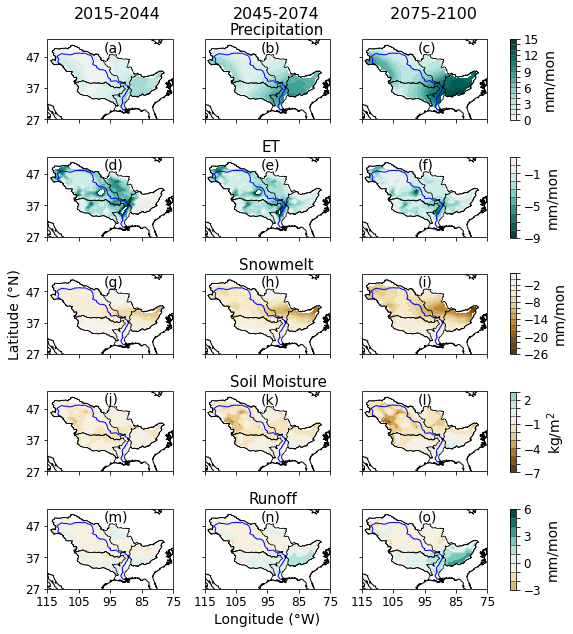

In [124]:

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

tickFontSize = 12
textFontSize = 14
#legendFontSize = 10
paramFontSize = 15
titleFontSize = 16

cbarTickFontSize = 12
cbarTextFontSize = 14

figTitleDistY = 1.02
linewidth = 0.7
#++++++++++++++++++++

class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return np.ma.masked_array(np.interp(value, x, y))



latTickLebelsStr = ['27', '37', '47', ]
lonTickLebelsStr = ['115', '105', '95', '85', '75',]

latTicks = [27, 37, 47]
lonTicks = [-115, -105, -95, -85, -75]

yLimLow = 27
yLimHigh = 52.5

xLimLow = -115
xLimHigh = -75

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig = plt.figure(figsize=(13, 10), constrained_layout=True)
axs = [plt.subplot(5, 3, x + 1, projection = ccrs.PlateCarree()) for x in range(15)]

print(axs)
ax1 = axs[0]

cp1 = ax1.contourf(x_Us, y_Us,param_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_precip,norm=norm_precip,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax1.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
missi = cfeature.ShapelyFeature(basin_Missi, ccrs.PlateCarree())
arkansas = cfeature.ShapelyFeature(basin_Arkansas, ccrs.PlateCarree())
missouri = cfeature.ShapelyFeature(basin_Missouri, ccrs.PlateCarree())
ohio = cfeature.ShapelyFeature(basin_Ohio, ccrs.PlateCarree())

ax1.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax1.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax1.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax1.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax1.add_feature(cfeature.COASTLINE)
ax1.set_xlim([xLimLow, xLimHigh])
ax1.set_ylim([yLimLow, yLimHigh])

ax1.set_yticks(latTicks)
ax1.set_xticks(lonTicks) 

ax1.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax1.set_xticklabels('', fontSize = tickFontSize)
ax1.set_title('(a)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax1.text(-106.5, 59, r'2015-2044', fontsize=titleFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
cp2 = ax2.contourf(x_Us, y_Us,param_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_precip,norm=norm_precip,)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

p2 = ax2.get_position().get_points().flatten()
cbax2 = fig.add_axes([p2[0]+0.20, +0.770, (p2[2]-p2[0])*0.04, 0.112])

cbar2 =plt.colorbar(cp2, ax=ax2, cax=cbax2, shrink=.5, ticks=boundaries_precip, orientation = 'vertical') 
cbar2.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here   

for index, label in enumerate(cbar2.ax.yaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)
        
cbar2.set_label("mm/mon", fontsize = cbarTextFontSize)
ax2.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax2.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax2.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax2.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax2.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax2.add_feature(cfeature.COASTLINE)
ax2.set_xlim([xLimLow, xLimHigh])
ax2.set_ylim([yLimLow, yLimHigh])

ax2.set_yticks(latTicks)
ax2.set_xticks(lonTicks) 

ax2.set_yticklabels('', fontSize = tickFontSize)
ax2.set_xticklabels('', fontSize = tickFontSize)
ax2.set_title('(b)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax2.text(-106, 59, r'2045-2074', fontsize=titleFontSize)
ax2.text(-107, 54, r'Precipitation', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
cp3 = ax3.contourf(x_Us, y_Us,param_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_precip,norm=norm_precip,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax3.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax3.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax3.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax3.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax3.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax3.add_feature(cfeature.COASTLINE)
ax3.set_xlim([xLimLow, xLimHigh])
ax3.set_ylim([yLimLow, yLimHigh])

ax3.set_yticks(latTicks)
ax3.set_xticks(lonTicks) 

ax3.set_yticklabels('', fontSize = tickFontSize)
ax3.set_xticklabels('', fontSize = tickFontSize)
ax3.set_title('(c)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax3.text(-107.5, 59, r' 2075-2100', fontsize=titleFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax4 = axs[3]
cp4 = ax4.contourf(x_Us, y_Us,et_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels_et,norm=norm_et)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax4.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax4.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax4.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax4.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax4.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax4.add_feature(cfeature.COASTLINE)
ax4.set_xlim([xLimLow, xLimHigh])
ax4.set_ylim([yLimLow, yLimHigh])

ax4.set_yticks(latTicks)
ax4.set_xticks(lonTicks) 

ax4.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax4.set_xticklabels('', fontSize = tickFontSize)
ax4.set_title('(d)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax5 = axs[4]
cp5 = ax5.contourf(x_Us, y_Us,et_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels_et,norm=norm_et)
plt.grid(b=True, which='major', color='#666666', linestyle='-')

p5 = ax5.get_position().get_points().flatten()
cbax5 = fig.add_axes([p5[0]+0.20, +0.606, (p5[2]-p5[0])*0.04, 0.112])
cbar5 =plt.colorbar(cp5, ax=ax5, cax=cbax5, shrink=.5, ticks=boundaries_et, orientation = 'vertical') 
cbar5.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for index, label in enumerate(cbar5.ax.yaxis.get_ticklabels()):
    if index % 4 != 0:
        label.set_visible(False)

cbar5.set_label("mm/mon", fontsize = cbarTextFontSize)
ax5.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax5.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax5.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax5.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax5.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax5.add_feature(cfeature.COASTLINE)
ax5.set_xlim([xLimLow, xLimHigh])
ax5.set_ylim([yLimLow, yLimHigh])

ax5.set_yticks(latTicks)
ax5.set_xticks(lonTicks) 

ax5.set_yticklabels('', fontSize = tickFontSize)
ax5.set_xticklabels('', fontSize = tickFontSize)
ax5.set_title('(e)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax5.text(-97, 54, r'ET', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
cp6 = ax6.contourf(x_Us, y_Us,et_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG_r,levels = levels_et,norm=norm_et)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax6.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax6.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax6.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax6.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax6.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax6.add_feature(cfeature.COASTLINE)
ax6.set_xlim([xLimLow, xLimHigh])
ax6.set_ylim([yLimLow, yLimHigh])

ax6.set_yticks(latTicks)
ax6.set_xticks(lonTicks) 


ax6.set_yticklabels('', fontSize = tickFontSize)
ax6.set_xticklabels('', fontSize = tickFontSize)
ax6.set_title('(f)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax7 = axs[6]
cp7 = ax7.contourf(x_Us, y_Us,snowMelt_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_snowMelt,norm=norm_snowMelt,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax7.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax7.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax7.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax7.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax7.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax7.add_feature(cfeature.COASTLINE)
ax7.set_xlim([xLimLow, xLimHigh])
ax7.set_ylim([yLimLow, yLimHigh])

ax7.set_yticks(latTicks)
ax7.set_xticks(lonTicks) 

ax7.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax7.set_xticklabels('', fontSize = tickFontSize)

ax7.set_ylabel('Latitude (°N)', fontsize = textFontSize)
ax7.set_title('(g)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
cp8 = ax8.contourf(x_Us, y_Us,snowMelt_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_snowMelt,norm=norm_snowMelt)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

p8 = ax8.get_position().get_points().flatten()
cbax8 = fig.add_axes([p8[0]+0.20, +0.445, (p8[2]-p8[0])*0.04, 0.112])
cbar8 =plt.colorbar(cp8, ax=ax8, cax=cbax8, shrink=.5, ticks=boundaries_snowMelt, orientation = 'vertical') 
cbar8.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for index, label in enumerate(cbar8.ax.yaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)        

cbar8.set_label("mm/mon", fontsize = cbarTextFontSize)

ax8.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax8.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax8.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax8.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax8.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax8.add_feature(cfeature.COASTLINE)
ax8.set_xlim([xLimLow, xLimHigh])
ax8.set_ylim([yLimLow, yLimHigh])

ax8.set_yticks(latTicks)
ax8.set_xticks(lonTicks) 

ax8.set_yticklabels('', fontSize = tickFontSize)
ax8.set_xticklabels('', fontSize = tickFontSize)

ax8.set_title('(h)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax8.text(-104, 54, r'Snowmelt', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax9 = axs[8]
cp9 = ax9.contourf(x_Us, y_Us,snowMelt_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_snowMelt,norm=norm_snowMelt)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax9.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax9.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax9.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax9.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax9.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax9.add_feature(cfeature.COASTLINE)
ax9.set_xlim([xLimLow, xLimHigh])
ax9.set_ylim([yLimLow, yLimHigh])

ax9.set_yticks(latTicks)
ax9.set_xticks(lonTicks) 

ax9.set_yticklabels('', fontSize = tickFontSize)
ax9.set_xticklabels('', fontSize = tickFontSize)
ax9.set_title('(i)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax10 = axs[9]
cp10 = ax10.contourf(x_Us, y_Us,soilMoist_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_soilMoist,norm=norm_soilMoist,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax10.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax10.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax10.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax10.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax10.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax10.add_feature(cfeature.COASTLINE)

ax10.set_xlim([xLimLow, xLimHigh])
ax10.set_ylim([yLimLow, yLimHigh])

ax10.set_yticks(latTicks)
ax10.set_xticks(lonTicks) 

ax10.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax10.set_xticklabels('', fontSize = tickFontSize)
ax10.set_title('(j)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax11 = axs[10]
cp11 = ax11.contourf(x_Us, y_Us,soilMoist_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_soilMoist,norm=norm_soilMoist,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

p11 = ax11.get_position().get_points().flatten()
cbax11 = fig.add_axes([p11[0]+0.20, +0.280, (p11[2]-p11[0])*0.04, 0.112])

cbar11 =plt.colorbar(cp11, ax=ax11, cax=cbax11, shrink=.5, ticks=boundaries_soilMoist, orientation = 'vertical') 

cbar11.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for index, label in enumerate(cbar11.ax.yaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)        
        
    
cbar11.set_label("kg/$\mathregular{m^{2}}$", fontsize = cbarTextFontSize)
ax11.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax11.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax11.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax11.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax11.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax11.add_feature(cfeature.COASTLINE)
ax11.set_xlim([xLimLow, xLimHigh])
ax11.set_ylim([yLimLow, yLimHigh])

ax11.set_yticks(latTicks)
ax11.set_xticks(lonTicks) 

ax11.set_yticklabels('', fontSize = tickFontSize)
ax11.set_xticklabels('', fontSize = tickFontSize)
ax11.set_title('(k)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax11.text(-107, 54, r'Soil Moisture', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax12 = axs[11]
cp12 = ax12.contourf(x_Us, y_Us,soilMoist_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_soilMoist,norm=norm_soilMoist,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')
ax12.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax12.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax12.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax12.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax12.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax12.add_feature(cfeature.COASTLINE)
ax12.set_xlim([xLimLow, xLimHigh])
ax12.set_ylim([yLimLow, yLimHigh])

ax12.set_yticks(latTicks)
ax12.set_xticks(lonTicks) 

ax12.set_yticklabels('', fontSize = tickFontSize)
ax12.set_xticklabels('', fontSize = tickFontSize)
ax12.set_title('(l)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax13 = axs[12]
cp13 = ax13.contourf(x_Us, y_Us,runoff_scenEraOne_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_runoff,norm=norm_runoff,)

plt.grid(b=True, which='major', color='#666666', linestyle='-')


ax13.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m
ax13.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax13.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax13.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax13.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax13.add_feature(cfeature.COASTLINE)
ax13.set_xlim([xLimLow, xLimHigh])
ax13.set_ylim([yLimLow, yLimHigh])

ax13.set_yticks(latTicks)
ax13.set_xticks(lonTicks) 

ax13.set_yticklabels(latTickLebelsStr, fontSize = tickFontSize)
ax13.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax13.set_title('(m)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax14 = axs[13]
cp14 = ax14.contourf(x_Us, y_Us,runoff_scenEraTwo_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_runoff,norm=norm_runoff)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

p14 = ax14.get_position().get_points().flatten()
cbax14 = fig.add_axes([p14[0]+0.20, +0.117, (p14[2]-p14[0])*0.04, 0.112])

cbar14 =plt.colorbar(cp14, ax=ax14, cax=cbax14, shrink=.5, ticks=boundaries_runoff, orientation = 'vertical') 
cbar14.ax.tick_params(labelsize = cbarTickFontSize)  # set your label size here

for index, label in enumerate(cbar14.ax.yaxis.get_ticklabels()):
    if index % 3 != 0:
        label.set_visible(False)        
        
    
cbar14.set_label("mm/mon", fontsize = cbarTextFontSize)

ax14.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax14.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax14.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax14.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax14.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax14.add_feature(cfeature.COASTLINE)
ax14.set_xlim([xLimLow, xLimHigh])
ax14.set_ylim([yLimLow, yLimHigh])

ax14.set_yticks(latTicks)
ax14.set_xticks(lonTicks) 

ax14.set_yticklabels('', fontSize = tickFontSize)
ax14.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax14.set_xlabel('Longitude (°W)', fontsize = textFontSize)
ax14.set_title('(n)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
ax14.text(-101, 54, r'Runoff', fontsize=paramFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax15 = axs[14]
cp15 = ax15.contourf(x_Us, y_Us,runoff_scenEraThree_diff_masked_Missi,transform=ccrs.PlateCarree(),cmap=cm.BrBG,levels = levels_runoff,norm=norm_runoff)

plt.grid(b=True, which='major', color='#666666', linestyle='-')

ax15.add_feature(cfeature.RIVERS.with_scale('110m'), color='b', label='Rivers')     # couche rivières = was 50 m

ax15.add_feature(missi,facecolor='none',edgecolor='black',linewidth=linewidth) # Mississippi
ax15.add_feature(arkansas,facecolor='none',edgecolor='black',linewidth=linewidth) # Arkansas
ax15.add_feature(missouri,facecolor='none',edgecolor='black',linewidth=linewidth) # Missouri
ax15.add_feature(ohio,facecolor='none',edgecolor='black',linewidth=linewidth) # Ohio

ax15.add_feature(cfeature.COASTLINE)
ax15.set_xlim([xLimLow, xLimHigh])
ax15.set_ylim([yLimLow, yLimHigh])

ax15.set_yticks(latTicks)
ax15.set_xticks(lonTicks) 

ax15.set_yticklabels('', fontSize = tickFontSize)
ax15.set_xticklabels(lonTickLebelsStr, fontSize = tickFontSize)
ax15.set_title('(o)', x = 0.45, y=figTitleDistY, pad=-14, fontsize = textFontSize, loc='left')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.subplots_adjust(left=0.13,
                    bottom=0.1,
                    right=0.6,
                    top=0.9,
                    wspace=0.25,
                    hspace=0.1
                    )

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

    
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\anomSpatial\tcfParamMap.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\anomSpatial\tcfParamMap.png', dpi=600)  


plt.show()


In [125]:
STOP here ==============

SyntaxError: invalid syntax (<ipython-input-125-9c5471e7b37b>, line 1)